# Trabajo Práctico 2 - Procesamiento de Imágenes

## 1. Histogramas

### Ejercicio 7


> Transformar la distribución de intensidades de una imagen para que se parezca a la de otra. Implementar el ajuste de histograma usando OpenCV o skimage.exposure.match histograms(). Comparar los histogramas antes y después del ajuste.



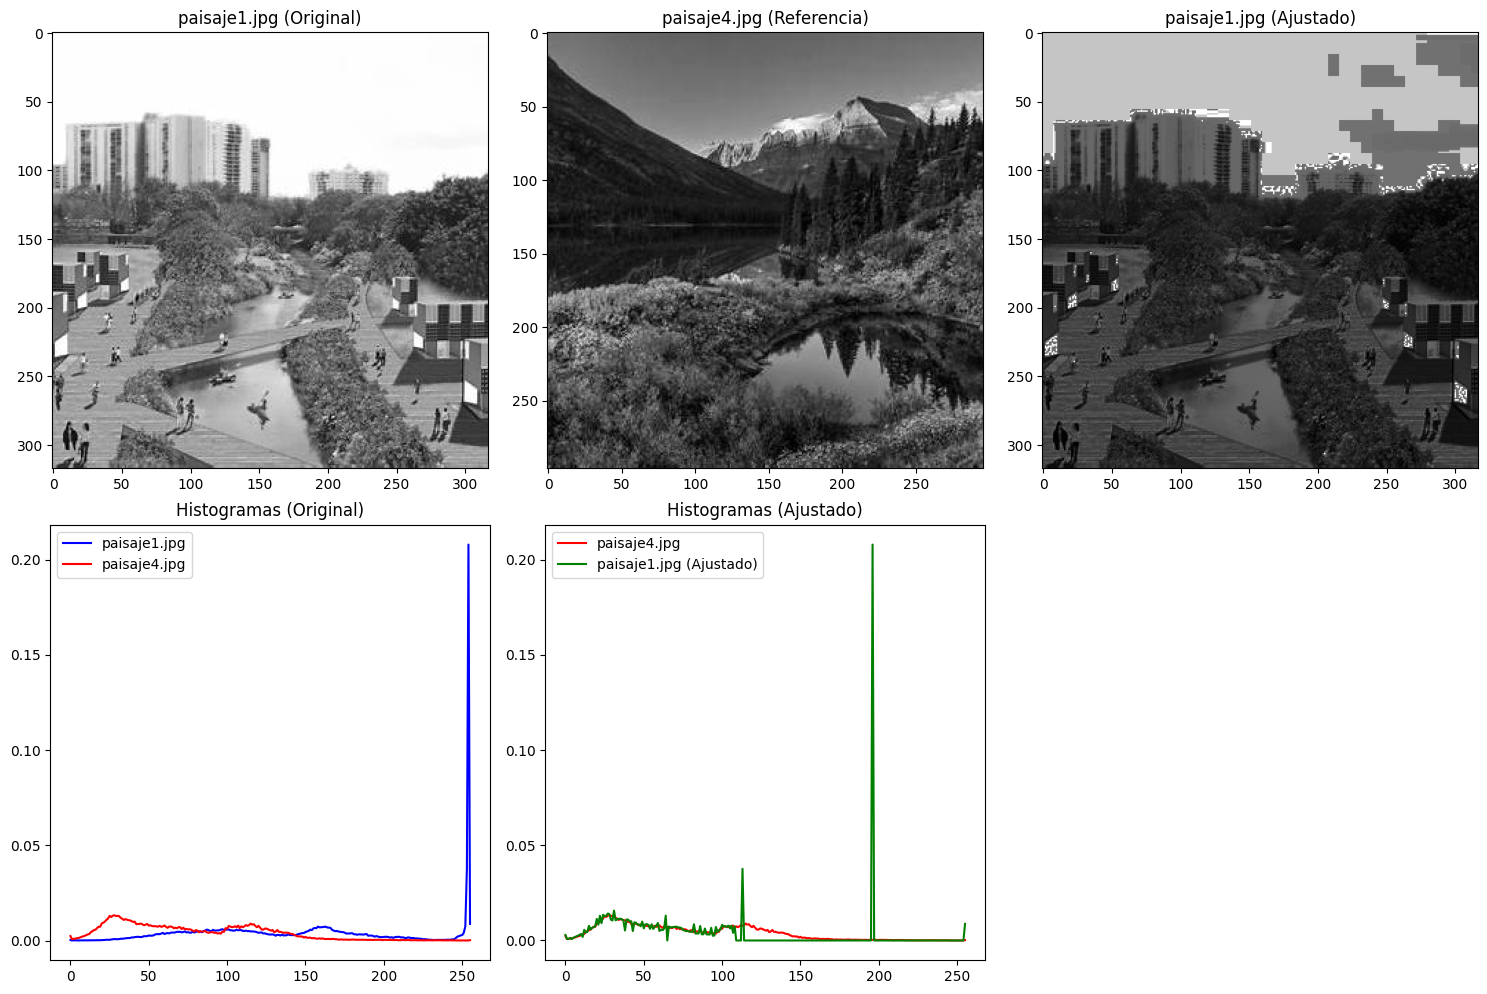

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import match_histograms

img1 = cv2.imread('./imagenes/paisaje1.jpg', cv2.IMREAD_GRAYSCALE)
img4 = cv2.imread('./imagenes/paisaje4.jpg', cv2.IMREAD_GRAYSCALE)

if img1 is None:
    print("Error al cargar paisaje1.jpg")
    exit()
if img4 is None:
    print("Error al cargar paisaje4.jpg")
    exit()

# Ajusta el histograma de img1 para que se parezca a img4
matched_img = match_histograms(img1, img4)

hist1 = cv2.calcHist([img1], [0], None, [256], [0, 256])
hist4 = cv2.calcHist([img4], [0], None, [256], [0, 256])
hist_matched = cv2.calcHist([matched_img.astype(np.uint8)], [0], None, [256], [0, 256])  # Convertir a uint8

hist1 = hist1 / np.sum(hist1)
hist4 = hist4 / np.sum(hist4)
hist_matched = hist_matched / np.sum(hist_matched)

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(img1, cmap='gray')
plt.title('paisaje1.jpg (Original)')

plt.subplot(2, 3, 2)
plt.imshow(img4, cmap='gray')
plt.title('paisaje4.jpg (Referencia)')

plt.subplot(2, 3, 3)
plt.imshow(matched_img, cmap='gray')
plt.title('paisaje1.jpg (Ajustado)')

plt.subplot(2, 3, 4)
plt.plot(hist1, label='paisaje1.jpg', color='blue')
plt.plot(hist4, label='paisaje4.jpg', color='red')
plt.legend()
plt.title('Histogramas (Original)')

plt.subplot(2, 3, 5)
plt.plot(hist4, label='paisaje4.jpg', color='red')
plt.plot(hist_matched, label='paisaje1.jpg (Ajustado)', color='green')
plt.legend()
plt.title('Histogramas (Ajustado)')

plt.tight_layout()
plt.show()

Luego de transformar la distribución de intensidades de `paisaje1.jpg` para que se parezca a la de `paisaje4.jpg` por medio de `skimage.exposure.match histograms()`, es posible ver que los histogramas, luego del ajuste, presentan mayor cantidad de similitudes en el rango de valores entre $0$ y $110$ (aproximadamente) con pequeñas oscilaciones. Para valores superiores a $110$, la versión ajustada de `paisaje1.jpg` contiene frecuencias muy altas para valores específicos, cercanos a $110$ y $190$.

### Ejercicio 8

> Aplicar ecualización de histograma a una imagen en escala de grises. Comparar la imagen original
con la ecualizada.



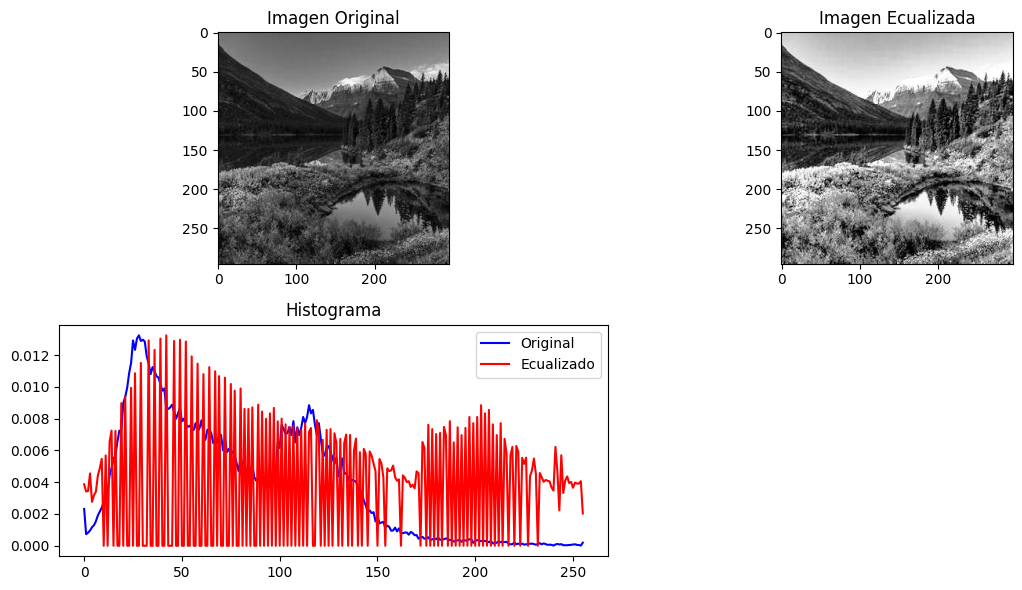

In [3]:
equ = cv2.equalizeHist(img4)

hist_original = cv2.calcHist([img4], [0], None, [256], [0, 256])
hist_ecualizado = cv2.calcHist([equ], [0], None, [256], [0, 256])

hist_original = hist_original / np.sum(hist_original)
hist_ecualizado = hist_ecualizado / np.sum(hist_ecualizado)

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(img4, cmap='gray')
plt.title('Imagen Original')

plt.subplot(2, 2, 2)
plt.imshow(equ, cmap='gray')
plt.title('Imagen Ecualizada')

plt.subplot(2, 2, 3)
plt.plot(hist_original, color='blue', label='Original')
plt.plot(hist_ecualizado, color='red', label='Ecualizado')
plt.legend()
plt.title('Histograma')

plt.tight_layout()
plt.show()


Al comparar las imágenes y sus histogramas, es posible ver que el contraste de la imagen original ha aumentado de forma notable en su versión ecualizada. Como es posible ver en el histograma de la versión ecualizada, las intensidades se distribuyen de forma más equitativa, aumentando las frecuencias de los valores más altos que eran menos frecuentes en la imagen original.

### Ejercicio 9
>  Implementar una umbralización manual eligiendo un valor de umbral. Usar el método de Otsu
para calcular un umbral óptimo automáticamente.

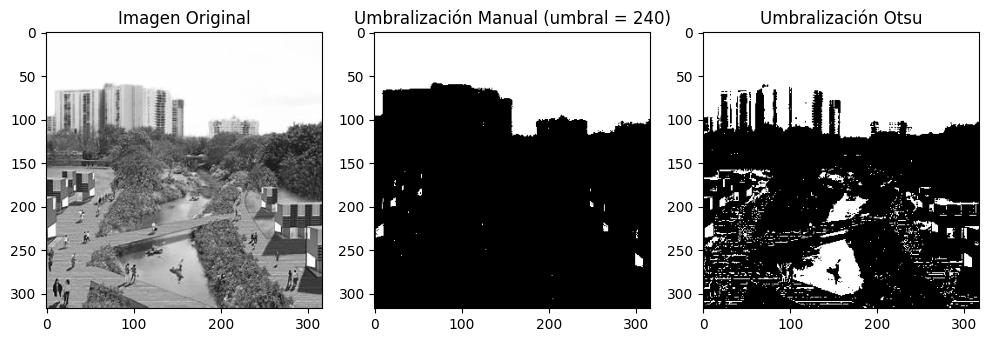

In [4]:
threshold_value = 240  # Valor de umbral manual

_, img_umbralizada_manual = cv2.threshold(img1, threshold_value, 255, cv2.THRESH_BINARY)

_, img_umbralizada_otsu = cv2.threshold(img1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(img1, cmap='gray')
plt.title('Imagen Original')

plt.subplot(1, 3, 2)
plt.imshow(img_umbralizada_manual, cmap='gray')
plt.title('Umbralización Manual (umbral = 240)')

plt.subplot(1, 3, 3)
plt.imshow(img_umbralizada_otsu, cmap='gray')
plt.title('Umbralización Otsu')

plt.tight_layout()
plt.show()

Fragmento extraido de [https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html]:

> Con la umbralización global, usamos un valor elegido arbitrariamente como umbral. En cambio, el método de Otsu evita tener que elegir un valor y lo determina automáticamente.

> Considera una imagen con solo dos valores de intensidad distintos (una imagen bimodal), donde el histograma consistiría únicamente en dos picos. Un buen umbral estaría en el medio de esos dos valores. De manera similar, el método de Otsu determina un valor de umbral global óptimo a partir del histograma de la imagen.

> Para hacerlo, se utiliza la función cv.threshold(), donde se pasa cv.THRESH_OTSU como una bandera adicional. El valor del umbral puede elegirse arbitrariamente. Luego, el algoritmo encuentra el valor de umbral óptimo, el cual se devuelve como la primera salida.

### Ejercicio 11
> Implementar la transformación gamma $I'=I^y$^ permitiendo ajustar el valor de $y$ dinámicamente. Aplicar diferentes valores de $y$ en distintas regiones de la imagen (por ejemplo, usando una máscara o adaptando $y$ en función del brillo local). Visualizar el efecto de la corrección gamma en la imagen y en su histograma.

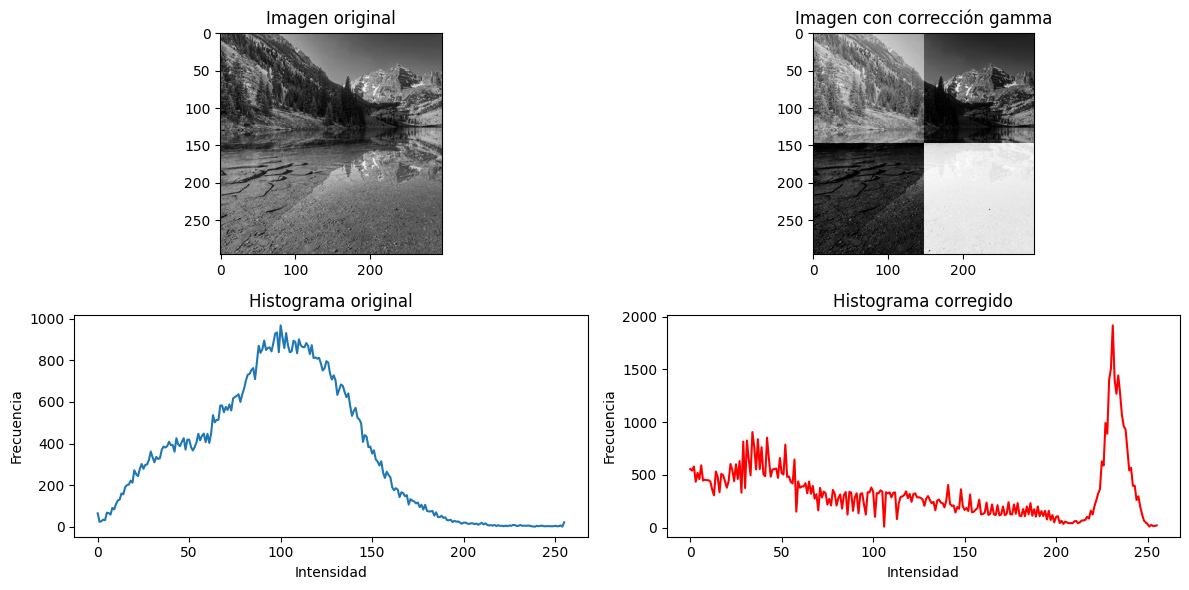

In [ ]:
def gamma_correction(image, gamma):
    image_normalized = image / 255.0
    image_corrected = np.power(image_normalized, gamma)
    return (image_corrected * 255).astype(np.uint8)

img = cv2.imread('./imagenes/paisaje3.jpg', cv2.IMREAD_GRAYSCALE)

regions = [
    (0, 0, img.shape[1] // 2, img.shape[0] // 2),  # Región superior izquierda
    (img.shape[1] // 2, 0, img.shape[1], img.shape[0] // 2), # Región superior derecha
    (0, img.shape[0] // 2, img.shape[1] // 2, img.shape[0]), # Región inferior izquierda
    (img.shape[1] // 2, img.shape[0] // 2, img.shape[1], img.shape[0]) # Región inferior derecha
]
gammas = [0.5, 1.5, 2.5, 0.1]

img_corrected = img.copy()
for i, (x_start, y_start, x_end, y_end) in enumerate(regions):
    region = img[y_start:y_end, x_start:x_end]
    img_corrected[y_start:y_end, x_start:x_end] = gamma_correction(region, gammas[i])

hist_original = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_corrected = cv2.calcHist([img_corrected], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen original')

plt.subplot(2, 2, 2)
plt.imshow(img_corrected, cmap='gray')
plt.title('Imagen con corrección gamma')

plt.subplot(2, 2, 3)
plt.plot(hist_original, label='Original')
plt.title('Histograma original')
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")

plt.subplot(2, 2, 4)
plt.plot(hist_corrected, label='Corregido', color='red')
plt.title('Histograma corregido')
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


## 2. Combinación de imágenes


### Ejercicio 3

> **Multiplicación y división de imágenes:** Multiplicar y dividir dos imágenes píxel a píxel utilizando `cv2.multiply()` y `cv2.divide()`, observando cómo afecta el brillo y contraste.



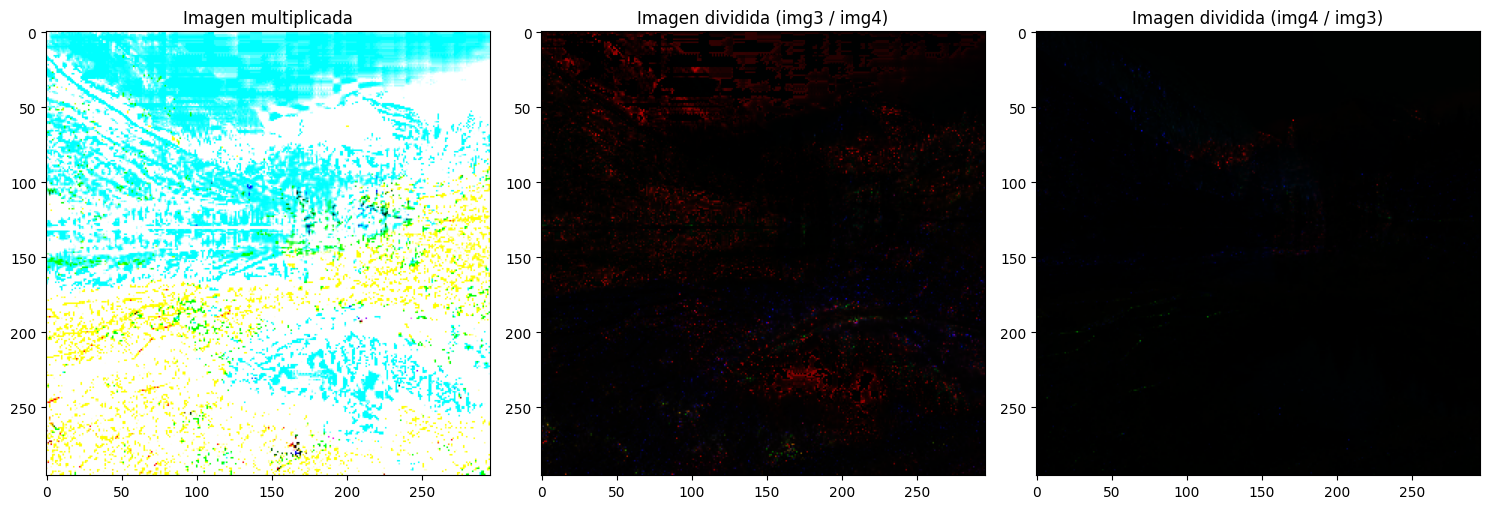

In [8]:
img3 = cv2.imread('./imagenes/paisaje3.jpg')
img4 = cv2.imread('./imagenes/paisaje4.jpg')

img_multiplicada = cv2.multiply(img3, img4)
img_dividida_1 = cv2.divide(img3, img4)
img_dividida_2 = cv2.divide(img4, img3)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img_multiplicada, cv2.COLOR_BGR2RGB))
plt.title('Imagen multiplicada')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(img_dividida_1, cv2.COLOR_BGR2RGB))
plt.title('Imagen dividida (img3 / img4)')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(img_dividida_2, cv2.COLOR_BGR2RGB))
plt.title('Imagen dividida (img4 / img3)')

plt.tight_layout()
plt.show()


### Ejercicio 5

> **Combinación con operadores lógicos:** Usa operadores booleanos (cv2.bitwise and, cv2.bitwise or,
cv2.bitwise xor) para fusionar imágenes basándose en una máscara binaria. Describir que sucede en cada caso.

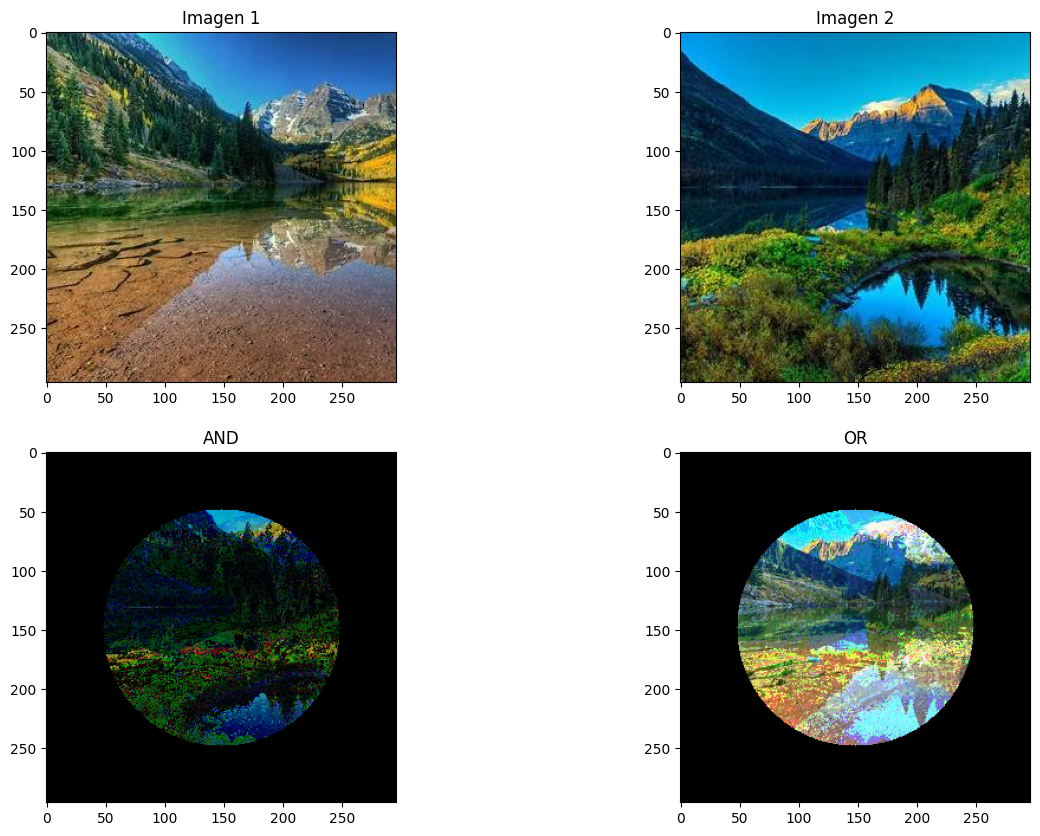

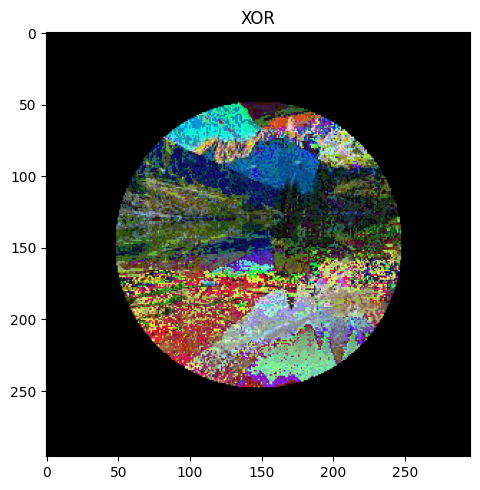

In [9]:
mask = np.zeros(img3.shape[:2], dtype=np.uint8)
cv2.circle(mask, (img3.shape[1] // 2, img3.shape[0] // 2), 100, 255, -1)

img_and = cv2.bitwise_and(img3, img4, mask=mask)
img_or = cv2.bitwise_or(img3, img4, mask=mask)
img_xor = cv2.bitwise_xor(img3, img4, mask=mask)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.title('Imagen 1')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
plt.title('Imagen 2')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(img_and, cv2.COLOR_BGR2RGB))
plt.title('AND')

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(img_or, cv2.COLOR_BGR2RGB))
plt.title('OR')


plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(img_xor, cv2.COLOR_BGR2RGB))
plt.title('XOR')

plt.tight_layout()
plt.show()


En los tres casos, cuando se provee la máscara circular, las operaciones AND, OR y XOR se realizan entre las dos imágenes sólo donde los valores de la máscara no son iguales a cero, es decir, en el interior del círculo.

Las operaciones bitwise AND, OR y XOR en imágenes BGR (Blue, Green, Red) funcionan canal por canal y pixel por pixel, comparando directamente los valores binarios de cada componente del color. Como los valores están en el rango [0, 255], cada componente tiene una representación binaria de 8 bits.

Viendo nuestras imágenes, podemos ver que aplicar el operador AND resulta en una imagen oscura porque el operador sólo mantiene un bit en 1 si los bits también son 1, y cero en caso contrario. Por ejemplo:

$$
pixel_{img3}(x,y) = 11001010  \\
pixel_{img4}(x,y) = 10101100  \\
resultado  = 10001000
$$

Aplicar el operador OR, por otro lado, resulta en una imagen brillante, ya que el operador mantiene un bit en 1 si al menos uno de los bits es 1. Por ejemplo:

$$
pixel_{img3}(x,y)  = 11001010  \\
pixel_{img4}(x,y)  = 10101100  \\
resultado = 11101110
$$

Aplicar el operador XOR, finalmente, resalta las diferencias entre las dos imágenes, ya que el operador mantiene un bit en 1 si los bits son diferentes. Por ejemplo:

$$
pixel_{img3}(x,y)  = 11001010  \\
pixel_{img4}(x,y)  = 10101100  \\
resultado = 01100110
$$

### Ejercicio 8

> **Uso de operadores lógicos para reemplazar partes de una imagen:** Reemplazar un área específica
de una imagen con otra utilizando operadores lógicos y relacionales para definir la región de interés
(ROI).

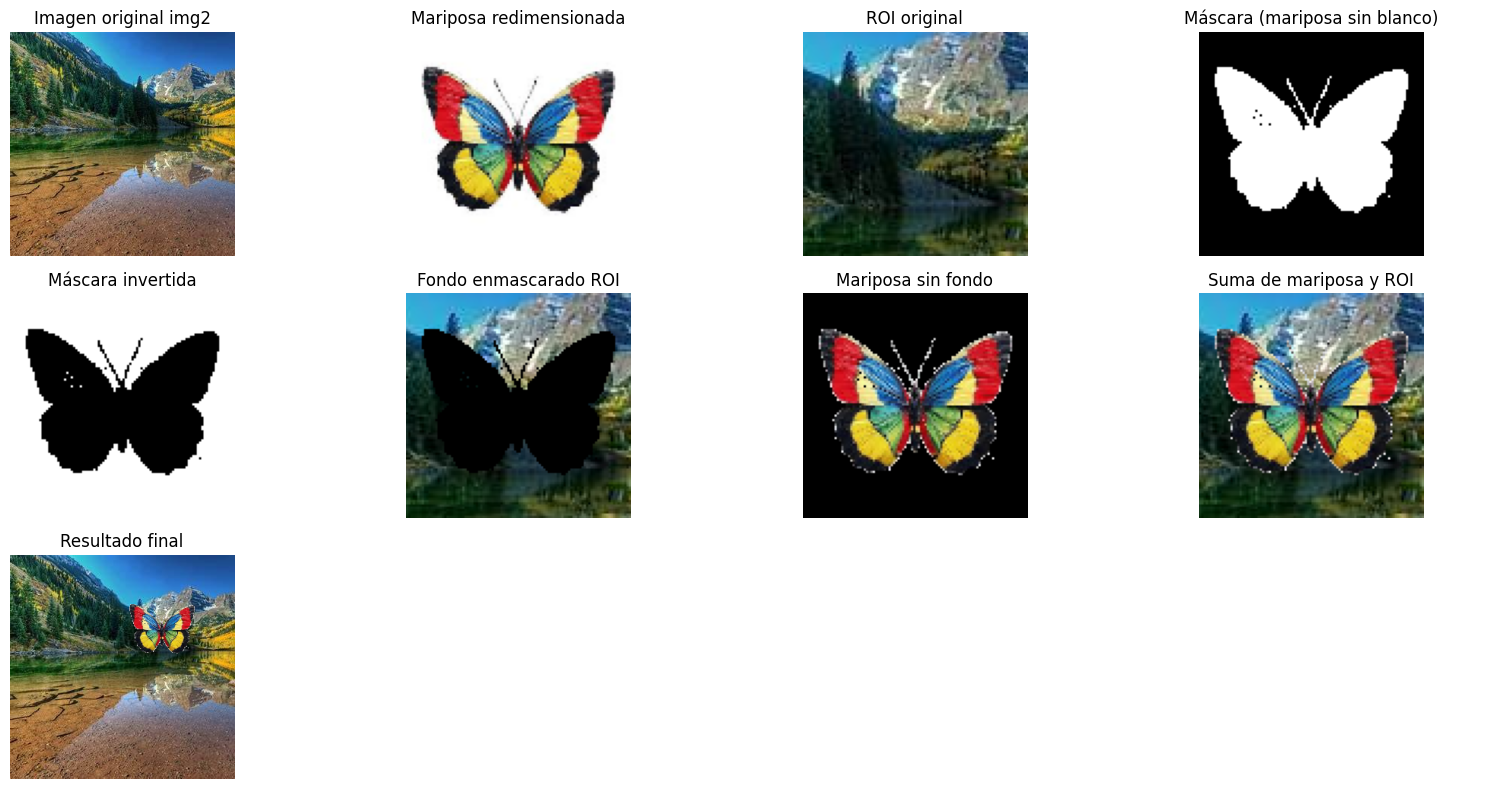

In [11]:
x_start, y_start = 150, 50
x_end, y_end = 250, 150

img2 = cv2.imread('./imagenes/paisaje3.jpg')
mariposa = cv2.imread('./imagenes/mariposa.jpg')
mariposa = cv2.resize(mariposa, (x_end - x_start, y_end - y_start))

# Paso 1: Región de interés
roi = img2[y_start:y_end, x_start:x_end]

# Paso 2: Crear máscara ignorando fondo blanco
gray_mariposa = cv2.cvtColor(mariposa, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(gray_mariposa, 240, 255, cv2.THRESH_BINARY_INV)

# Paso 3: Invertir máscara
mask_inv = cv2.bitwise_not(mask)

# Paso 4: Fondo de la ROI enmascarado
img2_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)

# Paso 5: Parte de la mariposa sin fondo blanco
mariposa_fg = cv2.bitwise_and(mariposa, mariposa, mask=mask)

# Paso 6: Suma de ambas partes
dst = cv2.add(img2_bg, mariposa_fg)

# Paso 7: Reemplazo en img2
img2_final = img2.copy()
img2_final[y_start:y_end, x_start:x_end] = dst

fig, axs = plt.subplots(3, 4, figsize=(16, 8))
axs = axs.ravel()

axs[0].imshow(cv2.cvtColor(cv2.imread('./imagenes/paisaje3.jpg'), cv2.COLOR_BGR2RGB))
axs[0].set_title('Imagen original img2')

axs[1].imshow(cv2.cvtColor(mariposa, cv2.COLOR_BGR2RGB))
axs[1].set_title('Mariposa redimensionada')

axs[2].imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
axs[2].set_title('ROI original')

axs[3].imshow(mask, cmap='gray')
axs[3].set_title('Máscara (mariposa sin blanco)')

axs[4].imshow(mask_inv, cmap='gray')
axs[4].set_title('Máscara invertida')

axs[5].imshow(cv2.cvtColor(img2_bg, cv2.COLOR_BGR2RGB))
axs[5].set_title('Fondo enmascarado ROI')

axs[6].imshow(cv2.cvtColor(mariposa_fg, cv2.COLOR_BGR2RGB))
axs[6].set_title('Mariposa sin fondo')

axs[7].imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
axs[7].set_title('Suma de mariposa y ROI')

axs[8].imshow(cv2.cvtColor(img2_final, cv2.COLOR_BGR2RGB))
axs[8].set_title('Resultado final')

# Quitar ejes
for ax in axs:
    ax.axis('off')

plt.tight_layout()
plt.show()


## Dominio Espacial

### Ejercicio 8

> **Suavizado y Sobel:** Aplicar un filtro gaussiano antes del operador de Sobel y analizar las diferencias
en la detección de bordes.

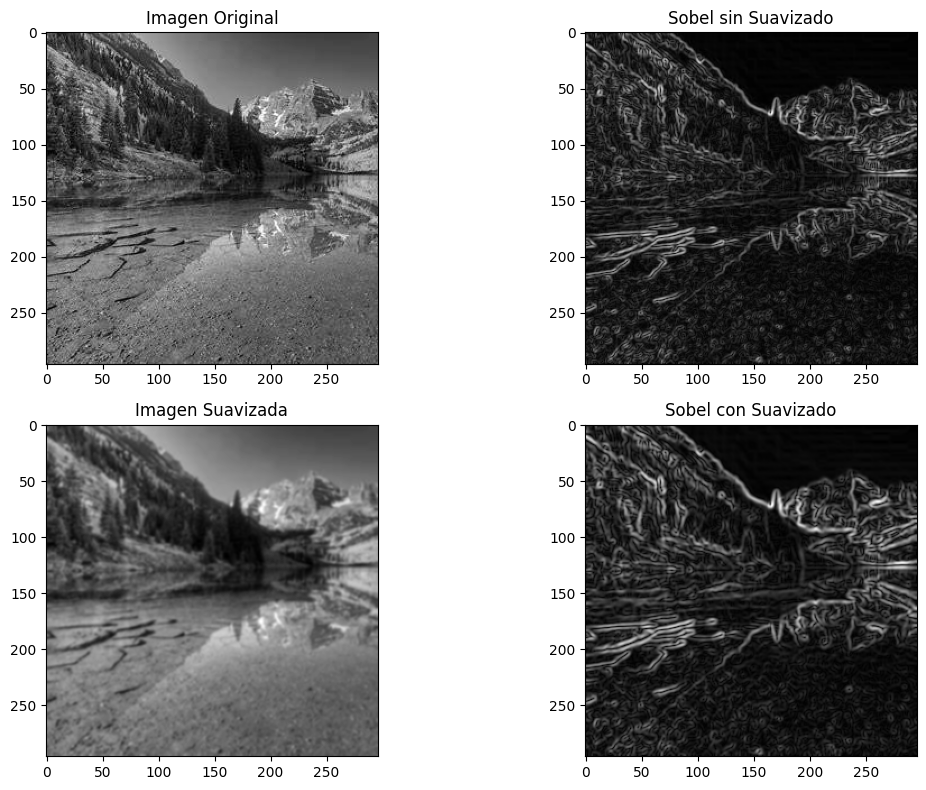

In [12]:
img = cv2.imread('./imagenes/paisaje3.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar filtro gaussiano
blurred_img = cv2.GaussianBlur(img, (5, 5), 0)

# Operador Sobel sin suavizado
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
sobel_img = cv2.magnitude(sobelx, sobely)

# Operador Sobel con suavizado
sobelx_blurred = cv2.Sobel(blurred_img, cv2.CV_64F, 1, 0, ksize=5)
sobely_blurred = cv2.Sobel(blurred_img, cv2.CV_64F, 0, 1, ksize=5)
sobel_blurred_img = cv2.magnitude(sobelx_blurred, sobely_blurred)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')

plt.subplot(2, 2, 2)
plt.imshow(sobel_img, cmap='gray')
plt.title('Sobel sin Suavizado')

plt.subplot(2, 2, 3)
plt.imshow(blurred_img, cmap='gray')
plt.title('Imagen Suavizada')


plt.subplot(2, 2, 4)
plt.imshow(sobel_blurred_img, cmap='gray')
plt.title('Sobel con Suavizado')

plt.tight_layout()
plt.show()


### Ejercicio 12

> Comparación de Métodos de Detección de Bordes: Comparar Sobel, Prewitt, Laplace y Canny
trabajando diversas imágenes con características diferentes.

./imagenes/paisaje1.jpg


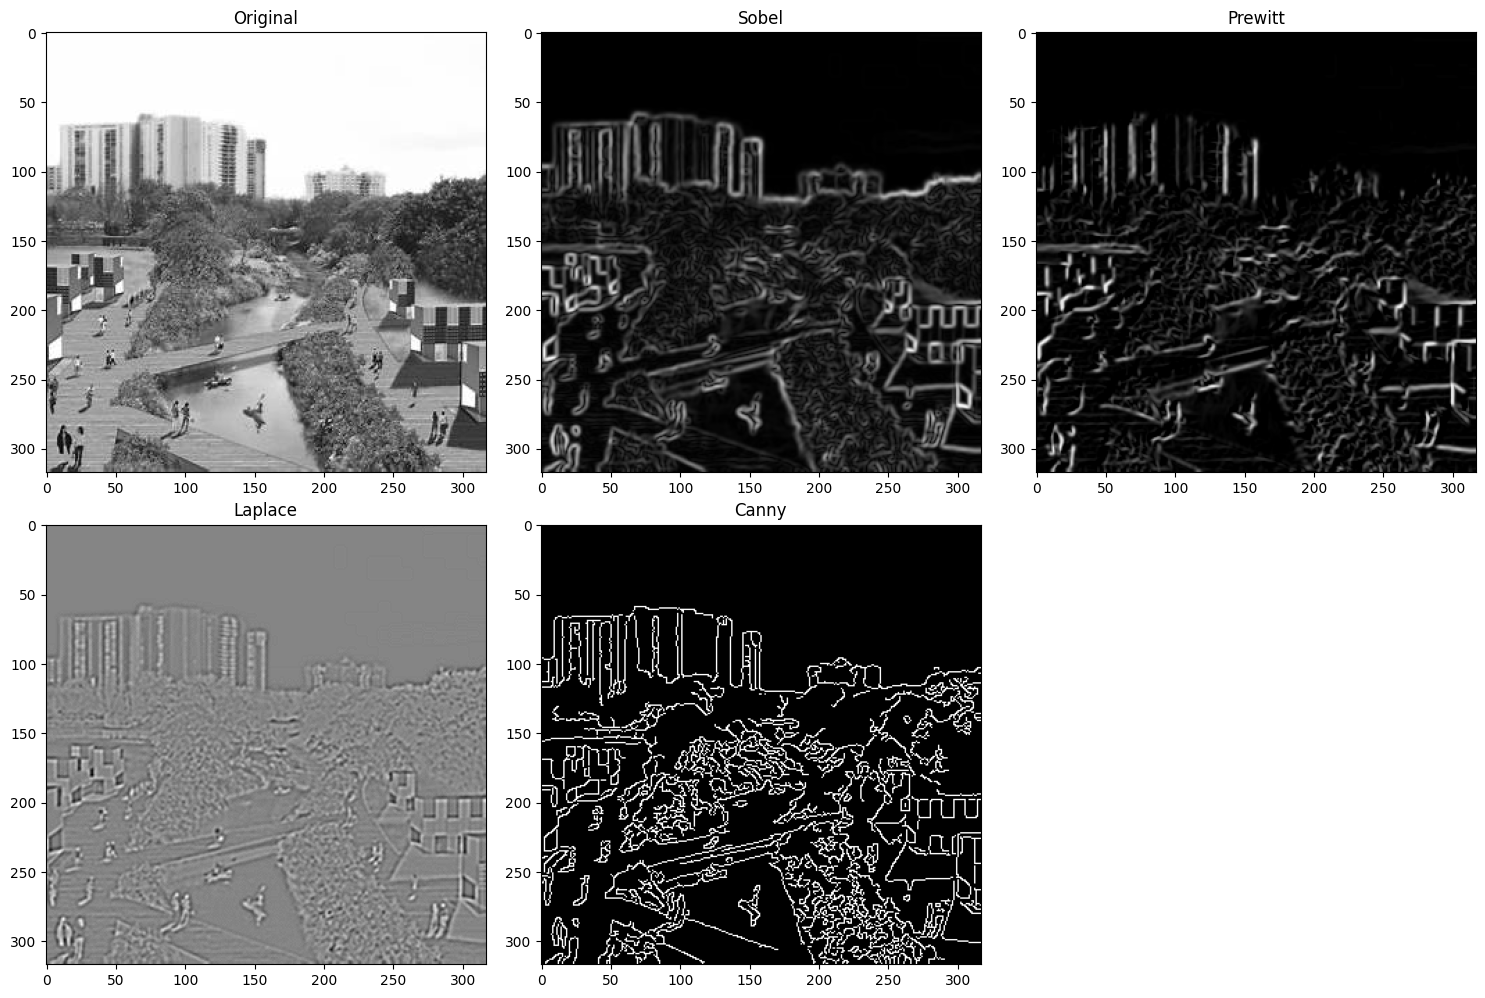

./imagenes/paisaje3.jpg


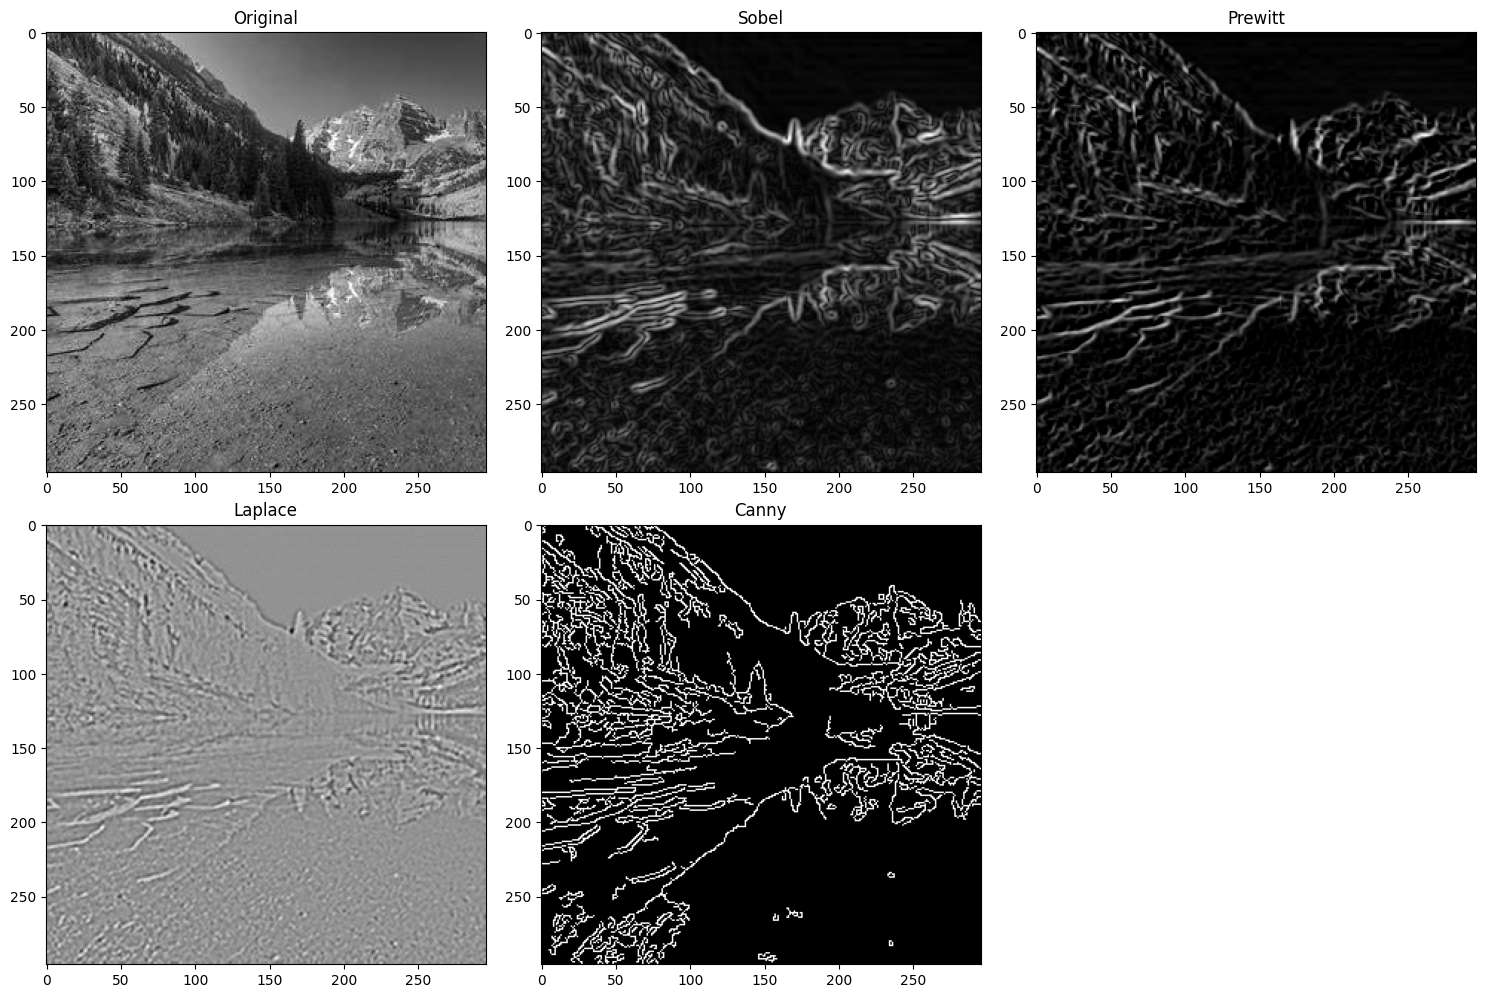

./imagenes/paisaje4.jpg


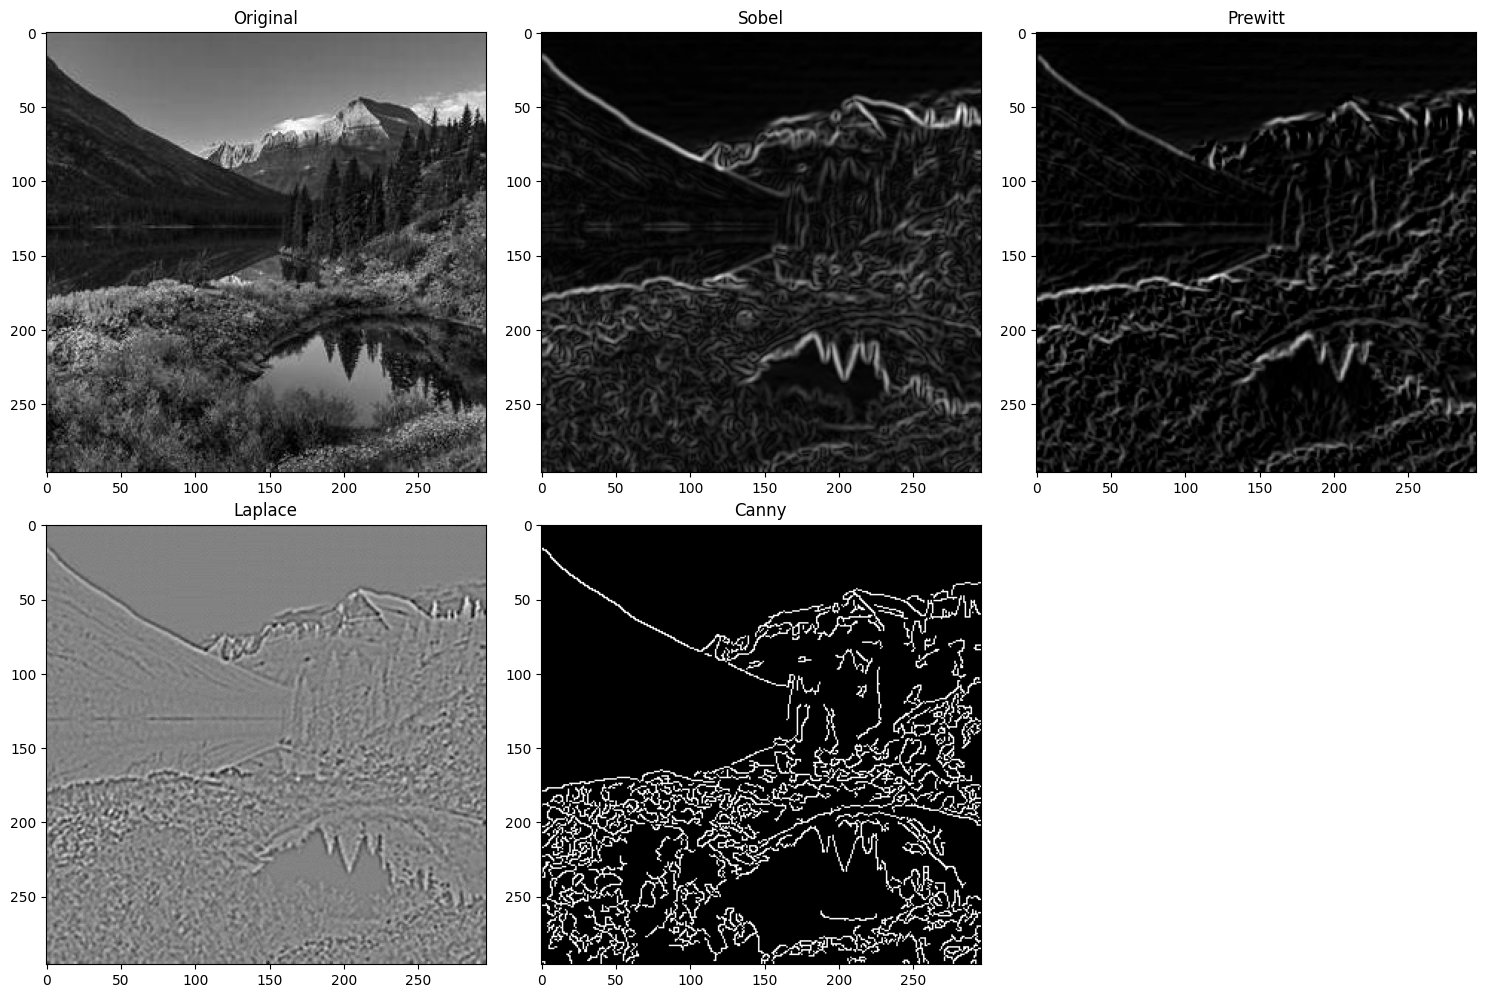

./imagenes/mariposa.jpg


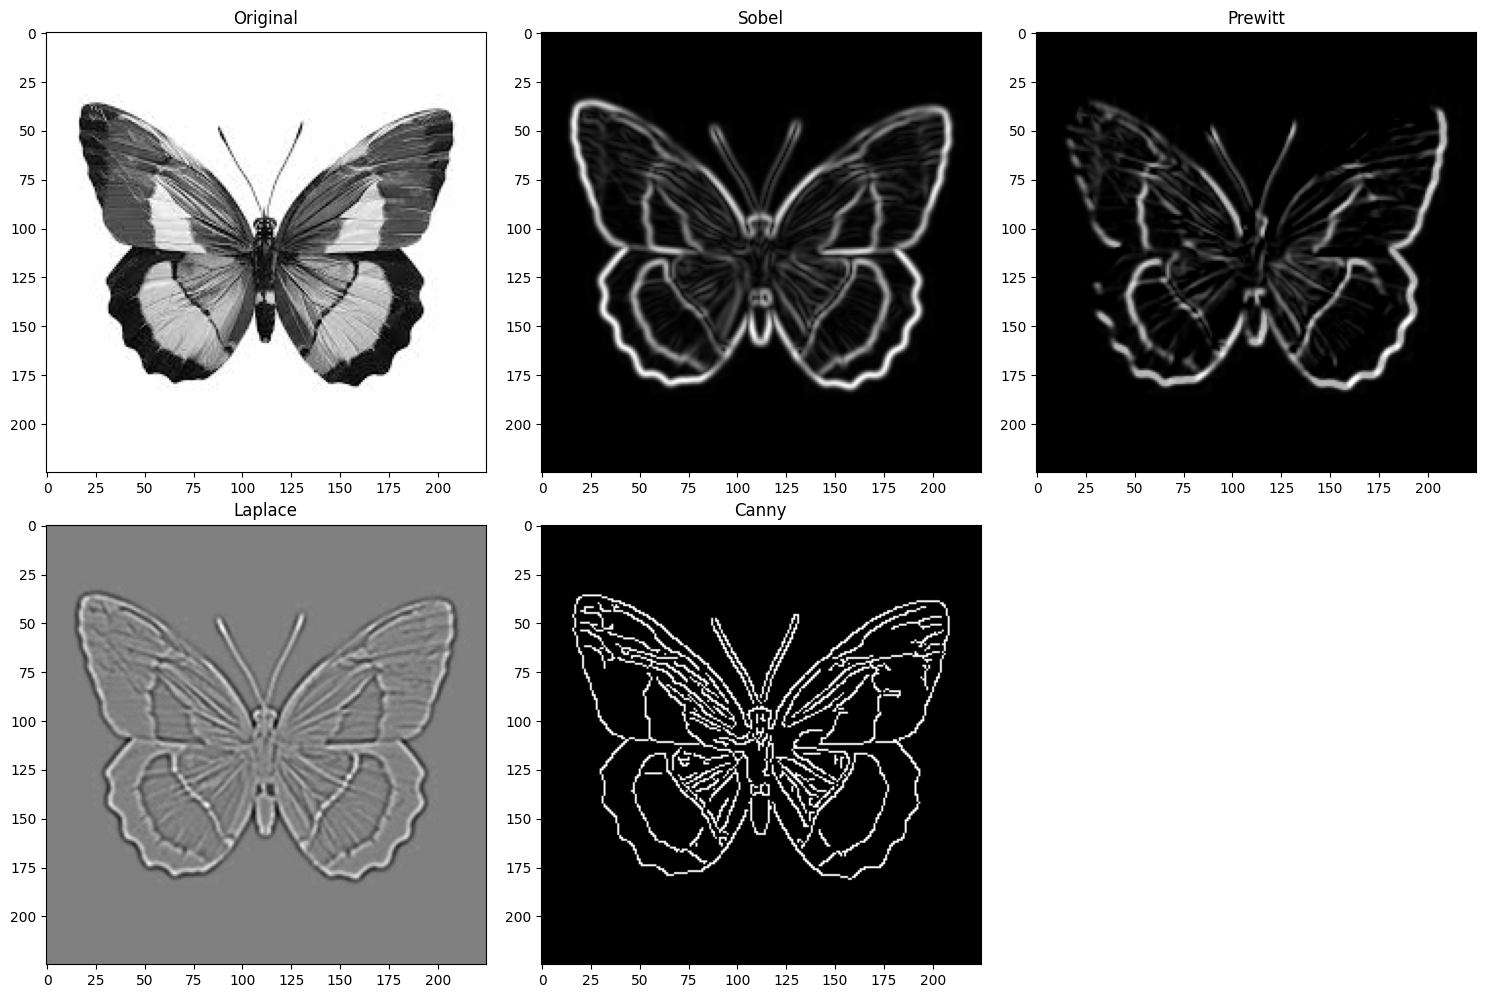

In [13]:
def compare_edge_detection(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error: Could not load {image_path}")
        return

    print(image_path)

    # Aplicar suavizado Gaussiano
    blurred_img = cv2.GaussianBlur(img, (5, 5), 0)

    # Sobel
    sobelx = cv2.Sobel(blurred_img, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(blurred_img, cv2.CV_64F, 0, 1, ksize=5)
    sobel_img = cv2.magnitude(sobelx, sobely)

    # Prewitt
    kernelx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    kernely = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
    prewittx = cv2.filter2D(blurred_img, -1, kernelx).astype(np.float32)
    prewitty = cv2.filter2D(blurred_img, -1, kernely).astype(np.float32)
    prewitt_img = cv2.magnitude(prewittx, prewitty)

    # Laplace
    laplacian_img = cv2.Laplacian(blurred_img, cv2.CV_64F)

    # Canny
    canny_img = cv2.Canny(blurred_img, 50, 150)

    plt.figure(figsize=(15, 10))

    plt.subplot(2, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original')

    plt.subplot(2, 3, 2)
    plt.imshow(sobel_img, cmap='gray')
    plt.title('Sobel')

    plt.subplot(2, 3, 3)
    plt.imshow(prewitt_img, cmap='gray')
    plt.title('Prewitt')

    plt.subplot(2, 3, 4)
    plt.imshow(laplacian_img, cmap='gray')
    plt.title('Laplace')

    plt.subplot(2, 3, 5)
    plt.imshow(canny_img, cmap='gray')
    plt.title('Canny')

    plt.tight_layout()
    plt.show()


image_files = ['paisaje1.jpg', 'paisaje3.jpg', 'paisaje4.jpg', 'mariposa.jpg']  # Agrega más imágenes si es necesario

for image_file in image_files:
    compare_edge_detection('./imagenes/' + image_file)


### Ejercicio 13

> **Realce de Detalles:** Aplicar un filtro de paso alto y sumarlo a la imagen original para mejorar los
detalles.

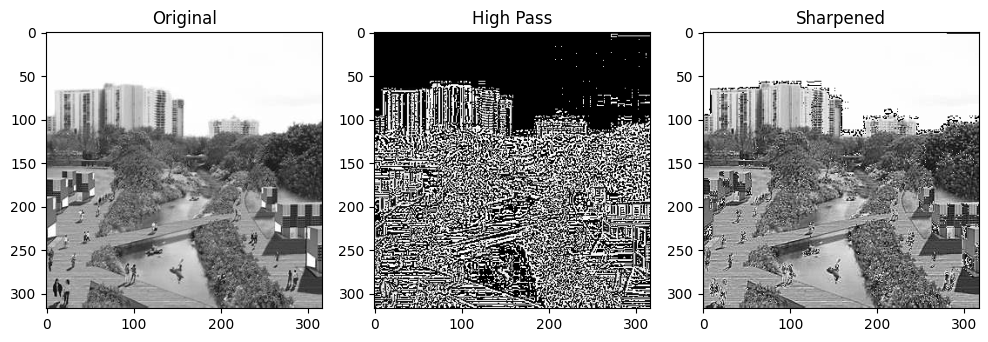

In [14]:
def high_pass_filter(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error: Could not load {image_path}")
        return

    blurred = cv2.GaussianBlur(img, (5, 5), 0)

    high_pass = img - blurred

    sharpened = img + high_pass

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original')

    plt.subplot(1, 3, 2)
    plt.imshow(high_pass, cmap='gray')
    plt.title('High Pass')

    plt.subplot(1, 3, 3)
    plt.imshow(sharpened, cmap='gray')
    plt.title('Sharpened')

    plt.tight_layout()
    plt.show()

high_pass_filter('./imagenes/paisaje1.jpg')


### Ejercicio 15
> Filtro de Diferencia Gaussiana (DoG): Aplicar la técnica de Diferencia de Gaussiana para resaltar bordes.



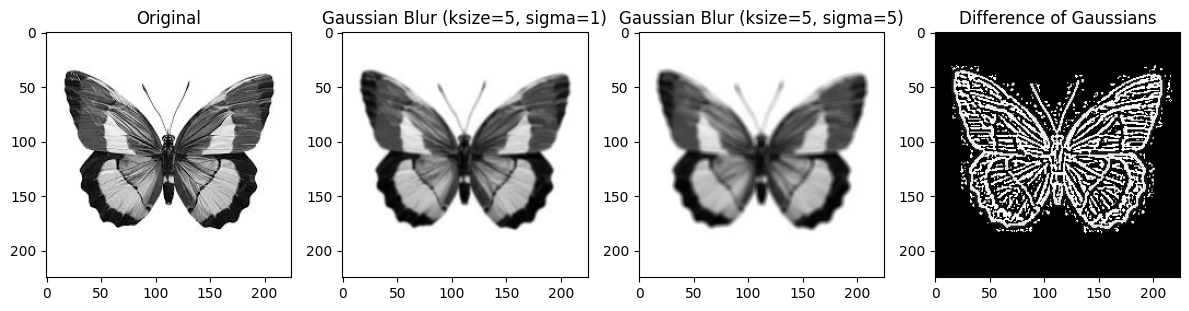

In [15]:
def dog_filter(image_path, ksize1=5, sigma1=1, ksize2=5, sigma2=5):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error: Could not load {image_path}")
        return

    blurred1 = cv2.GaussianBlur(img, (ksize1, ksize1), sigma1)
    blurred2 = cv2.GaussianBlur(img, (ksize2, ksize2), sigma2)

    dog_image = blurred1 - blurred2

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 4, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original')

    plt.subplot(1, 4, 2)
    plt.imshow(blurred1, cmap='gray')
    plt.title(f'Gaussian Blur (ksize={ksize1}, sigma={sigma1})')

    plt.subplot(1, 4, 3)
    plt.imshow(blurred2, cmap='gray')
    plt.title(f'Gaussian Blur (ksize={ksize1}, sigma={sigma2})')

    plt.subplot(1, 4, 4)
    plt.imshow(dog_image, cmap='gray')
    plt.title('Difference of Gaussians')

    plt.tight_layout()
    plt.show()

dog_filter('./imagenes/mariposa.jpg')
